In [1]:
from myutils import *

In [3]:
train, test = preprocess_data()

49972it [00:10, 4698.83it/s]
49972it [00:09, 5391.75it/s]


In [4]:
train.head()

,Headline,Body ID,Stance,articleBody,count_refutes
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...,0
1,Seth Rogen to Play Apple’s Steve Wozniak,712,discuss,Danny Boyle is directing the untitled film\n\n...,0
2,Mexico police find mass grave near site 43 stu...,712,unrelated,Danny Boyle is directing the untitled film\n\n...,0
3,Mexico Says Missing Students Not Found In Firs...,712,unrelated,Danny Boyle is directing the untitled film\n\n...,1
4,New iOS 8 bug can delete all of your iCloud do...,712,unrelated,Danny Boyle is directing the untitled film\n\n...,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidfvect(train, test):

    # Get the whole set of for vectorizing the words
    corpus = pd.concat([train['articleBody'], test['articleBody']]).values

    # Term inverse freq vectorizer
    tfidf = TfidfVectorizer()

    tfidf.fit(corpus)

    return tfidf


In [10]:
tf = tfidfvect(train, test)

In [12]:
train.loc[0, 'articleBody']

'Danny Boyle is directing the untitled film\n\nSeth Rogen is being eyed to play Apple co-founder Steve Wozniak in Sony’s Steve Jobs biopic.\n\nDanny Boyle is directing the untitled film, based on Walter Isaacson\'s book and adapted by Aaron Sorkin, which is one of the most anticipated biopics in recent years.\n\nNegotiations have not yet begun, and it’s not even clear if Rogen has an official offer, but the producers — Scott Rudin, Guymon Casady and Mark Gordon — have set their sights on the talent and are in talks.\n\nOf course, this may all be for naught as Christian Bale, the actor who is to play Jobs, is still in the midst of closing his deal. Sources say that dealmaking process is in a sensitive stage.\n\nInsiders say Boyle will is flying to Los Angeles to meet with actress to play one of the female leads, an assistant to Jobs. Insiders say that Jessica Chastain is one of the actresses on the meeting list.\n\nWozniak, known as "Woz," co-founded Apple with Jobs and Ronald Wayne. He

In [18]:
X = tf.transform(train['articleBody'])

<1x23180 sparse matrix of type '<class 'numpy.float64'>'
	with 126 stored elements in Compressed Sparse Row format>

In [16]:
import matplotlib.pyplot as plt

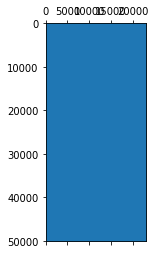

In [19]:
# How sparse is the data
plt.spy(X)

In [20]:
type(X)

scipy.sparse.csr.csr_matrix

In [21]:
import scipy.sparse as sp

a = sp.csr_matrix([[1,2,3],[4,5,6]])
b = sp.csr_matrix([[7,8,9],[10,11,12]])

In [26]:
a.toarray()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int64)

In [27]:
b.toarray()

array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int64)

In [31]:
sp.hstack((a, b)).toarray()

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]], dtype=int64)

In [32]:
sp.hstack((a, b))

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in COOrdinate format>